In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease/heart_disease.csv


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df_path = '../input/heart-disease/heart_disease.csv'
df = pd.read_csv(df_path)
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


<div style="background-color: 	#ddb464; padding: 25px; border-radius: 10px;font-size:20px;font-weight:10px">
  <h1 style="color: #333;"><strong>Filtering Individuals Aged ≤30</strong></h1>
</div>

In [23]:
# Filter the DataFrame to include only rows where 'Age' is less than or equal to 30
df_u30 = df[df['Age'] <= 30]

# Calculate the number of missing values in each column of the filtered DataFrame
df_u30_missing = df_u30.isna().sum()

# Display the result
df_u30_missing

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)


Age                       0
Gender                    7
Blood Pressure            1
Cholesterol Level         4
Exercise Habits           5
Smoking                   6
Family Heart Disease      4
Diabetes                  5
BMI                       3
High Blood Pressure       5
Low HDL Cholesterol       5
High LDL Cholesterol      6
Alcohol Consumption     490
Stress Level              5
Sleep Hours               6
Sugar Consumption        12
Triglyceride Level        5
Fasting Blood Sugar       4
CRP Level                 5
Homocysteine Level        2
Heart Disease Status      0
dtype: int64

<div style="background-color:	#ddb464; padding: 25px; border-radius: 10px;font-size:20px;font-weight:10px">
  <h1 style="color: #333;"><strong>Handling Missing Values</strong></h1>
</div>

In [24]:
# Select only the numeric columns (float64 and int64) from the filtered DataFrame
numeric_cols = df_u30.select_dtypes(include=['float64', 'int64'])

# Calculate the number of missing values in each numeric column
numeric_cols_missing = numeric_cols.isna().sum()

# Display the result
numeric_cols_missing

Age                    0
Blood Pressure         1
Cholesterol Level      4
BMI                    3
Sleep Hours            6
Triglyceride Level     5
Fasting Blood Sugar    4
CRP Level              5
Homocysteine Level     2
dtype: int64

In [25]:
# Fill missing values in numeric columns with their respective column means
df_u30.loc[:, numeric_cols.columns] = numeric_cols.apply(lambda col: col.fillna(col.mean()))

# Generate summary statistics for the updated DataFrame and transpose the result
summary_stats = df_u30.describe().T

# Display the summary statistics
summary_stats

,count,mean,std,min,25%,50%,75%,max
Age,1985.0,24.023678,3.765418,18.000000,21.000000,24.000000,27.000000,30.000000
Blood Pressure,1985.0,150.299899,17.603217,120.000000,135.000000,150.000000,166.000000,180.000000
Cholesterol Level,1985.0,224.416456,43.826083,150.000000,186.000000,224.416456,262.000000,300.000000
BMI,1985.0,29.134011,6.264224,18.014508,23.771554,29.321610,34.420415,39.974476
Sleep Hours,1985.0,6.972658,1.740191,4.006726,5.425130,6.981759,8.450129,9.992625
Triglyceride Level,1985.0,251.375253,87.957451,100.000000,175.000000,252.000000,327.000000,400.000000
Fasting Blood Sugar,1985.0,120.222110,23.399152,80.000000,100.000000,120.000000,140.000000,160.000000
CRP Level,1985.0,7.479155,4.376861,0.012698,3.581210,7.479155,11.385640,14.994920
Homocysteine Level,1985.0,12.546775,4.363815,5.000236,8.869325,12.629333,16.345775,19.997032


<div style="background-color:	#ddb464; padding: 25px; border-radius: 10px;font-size:20px;font-weight:10px">
  <h1 style="color: #333;"><strong>Visualizations and Insights</strong></h1>
</div>

#### Age Distribution

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

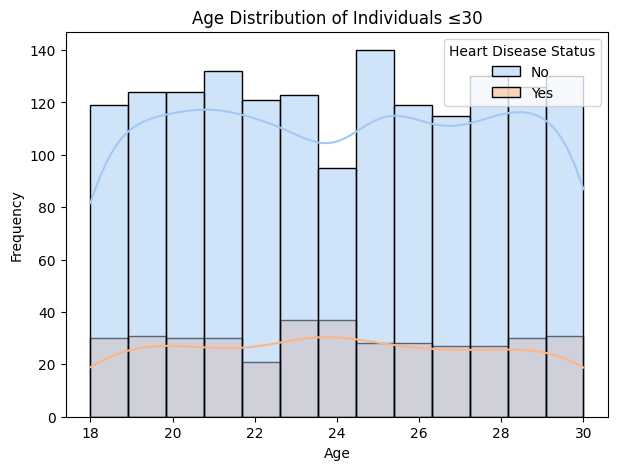

In [26]:
# Set the figure size
plt.figure(figsize=(7, 5))

# Create a histogram with KDE and hue for 'Heart Disease Status'
sns.histplot(
    x=df_u30['Age'], 
    kde=True, 
    hue=df_u30['Heart Disease Status'],
    palette='pastel'  # Changed color palette
)

# Add title and axis labels
plt.title("Age Distribution of Individuals ≤30")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Display the plot
plt.show()

#### Heart Disease by Gender

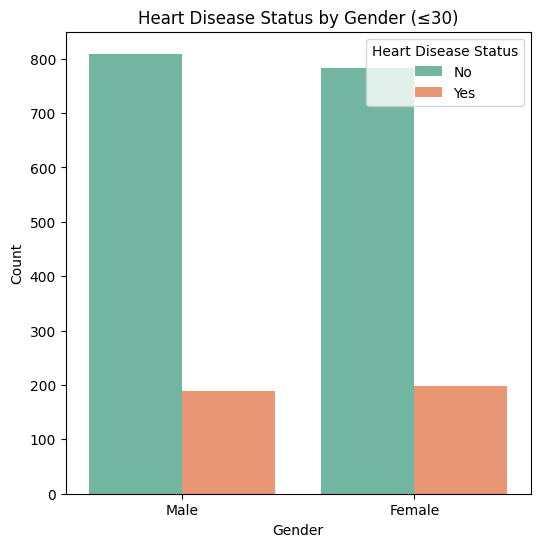

In [27]:
# Set the figure size
plt.figure(figsize=(6, 6))

# Create a count plot for 'Gender' with hue for 'Heart Disease Status'
sns.countplot(
    x='Gender', 
    hue='Heart Disease Status', 
    data=df_u30, 
    palette="Set2"  # Changed color palette
)

# Add title and axis labels
plt.title("Heart Disease Status by Gender (≤30)")
plt.xlabel("Gender")
plt.ylabel("Count")

# Display the plot
plt.show()

**Lifestyle Factors and Heart Disease:**

Lifestyle factors like smoking, alcohol consumption, and exercise habits were analyzed:


### Lifestyle Factors

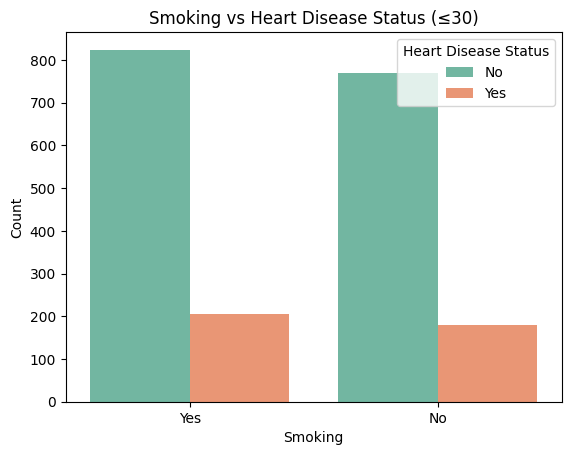

In [28]:
# Create a count plot for 'Smoking' with hue for 'Heart Disease Status'
sns.countplot(
    x='Smoking', 
    hue='Heart Disease Status', 
    data=df_u30, 
    palette="Set2"
)

# Add title and axis labels
plt.title("Smoking vs Heart Disease Status (≤30)")
plt.xlabel("Smoking")
plt.ylabel("Count")

# Display the plot
plt.show()

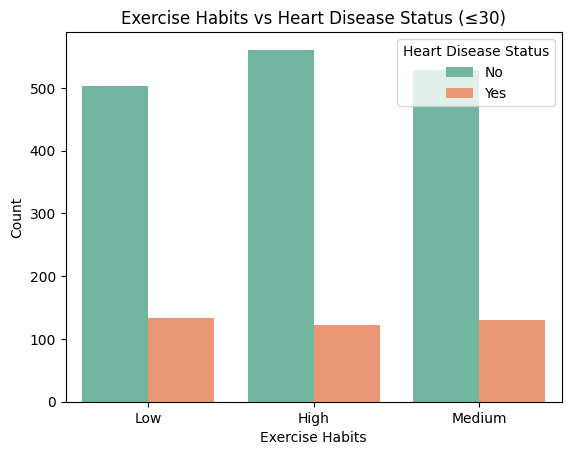

In [29]:
# Create a count plot for 'Exercise Habits' with hue for 'Heart Disease Status'
sns.countplot(
    x='Exercise Habits', 
    hue='Heart Disease Status', 
    data=df_u30, 
    palette="Set2"
)

# Add title and axis labels
plt.title("Exercise Habits vs Heart Disease Status (≤30)")
plt.xlabel("Exercise Habits")
plt.ylabel("Count")

# Display the plot
plt.show()

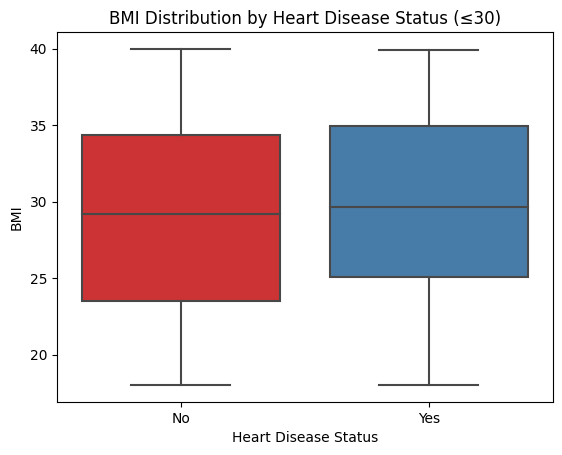

In [30]:
# Create a boxplot for 'BMI' grouped by 'Heart Disease Status'
sns.boxplot(
    x='Heart Disease Status', 
    y='BMI', 
    data=df_u30, 
    palette="Set1"
)

# Add title and axis labels
plt.title("BMI Distribution by Heart Disease Status (≤30)")
plt.xlabel("Heart Disease Status")
plt.ylabel("BMI")

# Display the plot
plt.show()

In [31]:
# Define the columns to analyze
cols = [
    'Blood Pressure', 'BMI', 'Cholesterol Level', 'Triglyceride Level', 
    'Sleep Hours', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level'
]

# Function to calculate mean values grouped by a status column
def calculate_mean_by_status(df, cols, status_col='Heart Disease Status'):
    """
    Calculate the mean values of specified columns grouped by a status column.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
        cols (list): List of columns to calculate means for.
        status_col (str): The column to group by (default: 'Heart Disease Status').
    
    Returns:
        pd.DataFrame: A DataFrame containing the mean values, transposed.
    """
    mean_values = df.groupby(status_col)[cols].mean().T
    return mean_values

# Calculate mean values for the specified columns
mean_by_status = calculate_mean_by_status(df_u30, cols)

# Display the result
print(mean_by_status)

Heart Disease Status          No         Yes
Blood Pressure        150.967021  147.545220
BMI                    29.006452   29.660726
Cholesterol Level     224.497288  224.082687
Triglyceride Level    249.923733  257.368864
Sleep Hours             6.946040    7.082571
Fasting Blood Sugar   119.902169  121.543210
CRP Level               7.524591    7.291543
Homocysteine Level     12.585831   12.385506


#### Subplots of Numeric Variables by Heart Disease Status

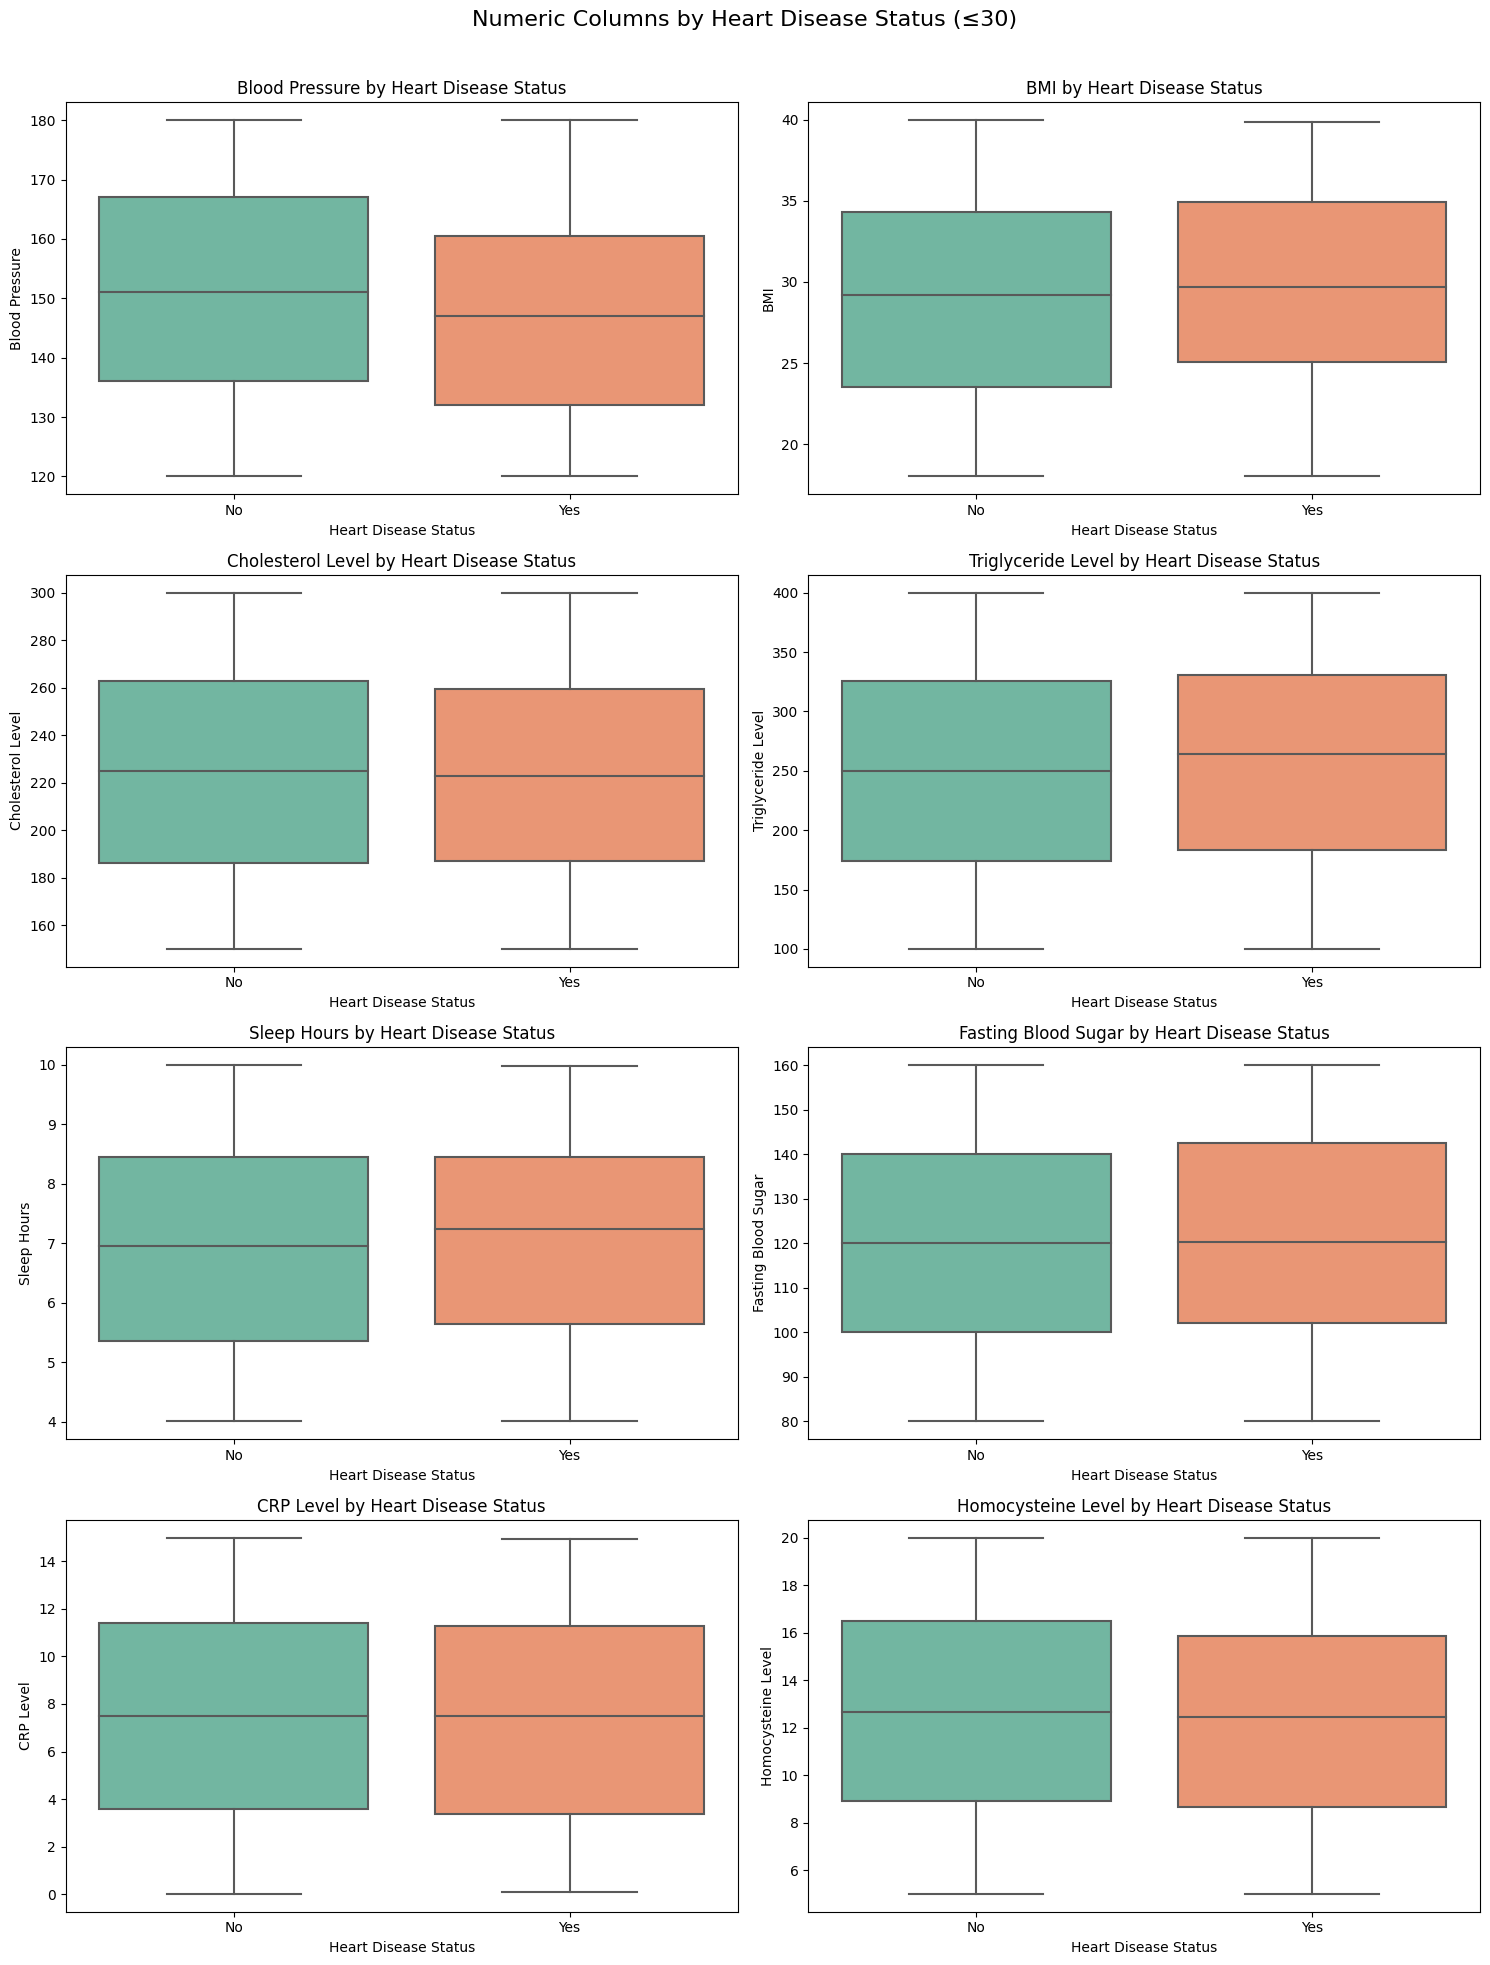

In [32]:
# Define the numeric columns to visualize
cols = [
    'Blood Pressure', 'BMI', 'Cholesterol Level', 'Triglyceride Level', 
    'Sleep Hours', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level'
]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.suptitle("Numeric Columns by Heart Disease Status (≤30)", fontsize=16)

# Plot boxplots for each numeric column
for i, col in enumerate(cols):
    ax = axes[i // 2, i % 2]  # Determine the subplot position
    sns.boxplot(
        x='Heart Disease Status', 
        y=col, 
        data=df_u30, 
        palette="Set2",  # Changed to a different color palette
        ax=ax
    )
    ax.set_title(f"{col} by Heart Disease Status")

# Adjust layout to prevent overlap and add padding
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Display the plot
plt.show()

#### Correlation Heatmap

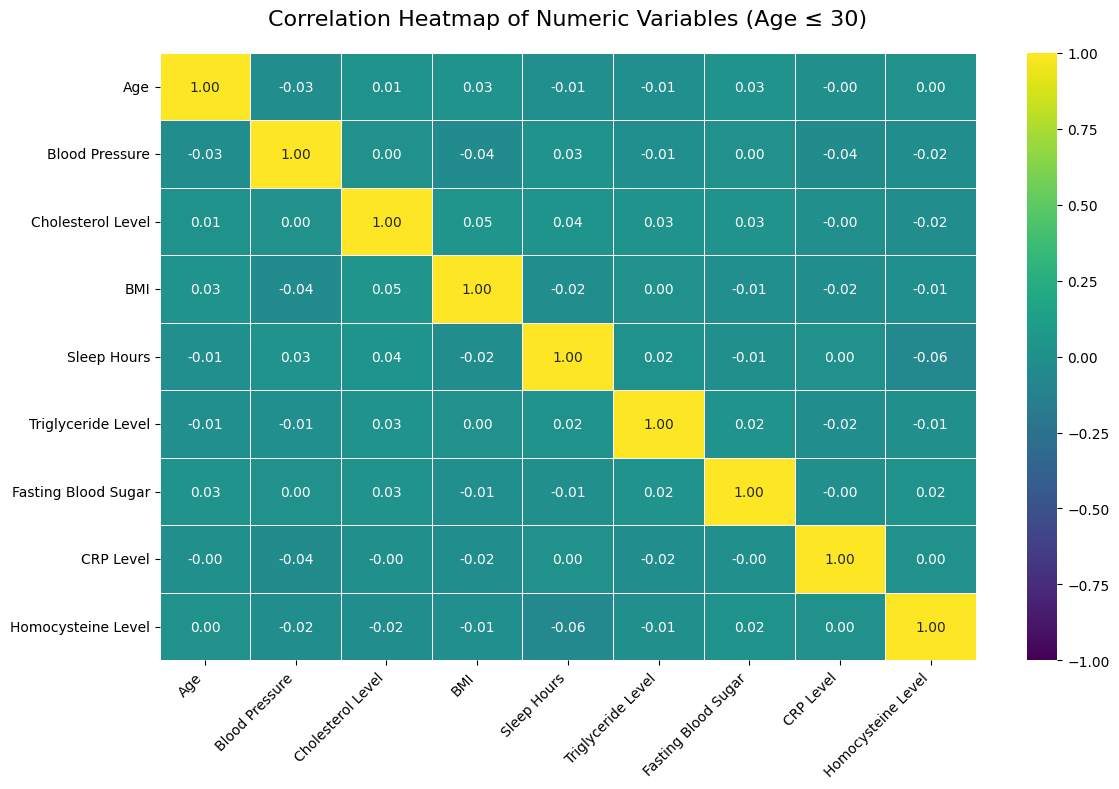

In [33]:
# Selecting numeric columns
numeric_cols = df_u30.select_dtypes(include=['float64', 'int64'])

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))  # Adjusted figure size for better visualization
sns.heatmap(
    numeric_cols.corr(), 
    annot=True, 
    cmap='viridis',  # Changed color palette to 'viridis'
    fmt=".2f", 
    linewidths=0.5,  # Added lines between cells for clarity
    vmin=-1, vmax=1  # Ensures the color scale is consistent for correlation values
)
plt.title("Correlation Heatmap of Numeric Variables (Age ≤ 30)", fontsize=16, pad=20)  # Improved title
plt.xticks(rotation=45, ha='right')  # Rotated x-axis labels for better readability
plt.yticks(rotation=0)  # Kept y-axis labels horizontal
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


<div style="background-color:	#ddb464; padding: 25px; border-radius: 10px;font-size:20px;font-weight:10px">
  <h1 style="color: #333;"><strong>Conclusion</strong></h1>
</div>

* **Key Findings:**
    * Individuals with heart disease showed significantly higher triglyceride levels and BMI.
    * Slightly elevated blood sugar was observed in the heart disease group.
    * Cholesterol and blood pressure showed less clear differences between groups.
* **Insights:**
    * Triglycerides and BMI appear to be important indicators of heart disease risk in this dataset.
    * Blood sugar levels may also play a role.
* **Limitations and Future Work:**
    * This analysis is descriptive; it does not establish causation.
    * Further statistical testing and multivariate analysis are needed.
    * Further research should be done to validate these findings.
* **Implications:**
    * Triglyceride levels and BMI should be considered in cardiovascular health assessments.
